In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

from nn.neural_network import NeuralNetwork
from nn.layers import Input, Convolutional, Dense, Reshape

In [2]:
def preprocess_data(x, y, limit):
    indexes = []
    n = 10
    for i in range(n):
        indexes.append(np.where(y == i)[0][:limit])

    all_indices = np.hstack(indexes)
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = np_utils.to_categorical(y)
    y = y.reshape(len(y), n, 1)
    return x, y


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 10)

In [4]:
model = NeuralNetwork(loss_f='MSE')

model.add_layer(Input(input_shape=x_train.shape[1:]))
model.add_layer(Convolutional(kernel_size=3, depth=3, act_f='sigmoid'))
model.add_layer(Convolutional(kernel_size=4, depth=1, act_f='sigmoid'))
model.add_layer(Reshape())
model.add_layer(Dense(n_neur=30, act_f='sigmoid'))
model.add_layer(Dense(n_neur=20, act_f='sigmoid'))
model.add_layer(Dense(n_neur=10, act_f='sigmoid'))

model.summary()

,Type,Activation Function,Input Shape,Output Shape
0,Input,None,None,"(1, 28, 28)"
1,Convolutional,Sigmoid,"(1, 28, 28)","(3, 26, 26)"
2,Convolutional,Sigmoid,"(3, 26, 26)","(1, 23, 23)"
3,Reshape,None,"(1, 23, 23)","(529, 1)"
4,Dense,Sigmoid,"(529, 1)","(30, 1)"
5,Dense,Sigmoid,"(30, 1)","(20, 1)"
6,Dense,Sigmoid,"(20, 1)","(10, 1)"


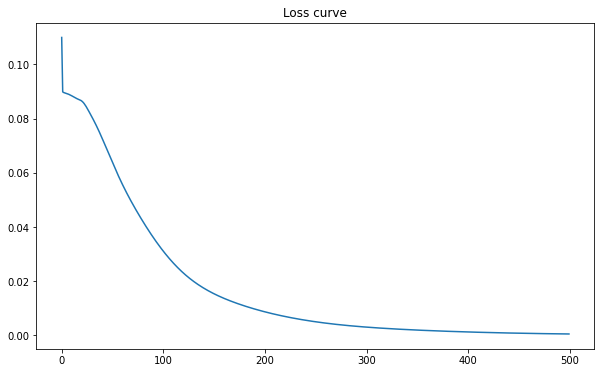

In [5]:
loss = model.fit(x_train, y_train, epochs=500, lr=0.01)
plt.figure(figsize=(10, 6))
plt.plot(list(range(len(loss))), loss)
plt.title('Loss curve')
plt.show()

In [6]:
yp = model.predict(x_test)
count = 0
for i in range(len(yp)):
    pred = np.argmax(yp[i])
    true = np.argmax(y_test[i])
    if pred == true: count = count + 1

print(f'Accuracy: {count / len(yp) * 100}%')

Accuracy: 92.0%


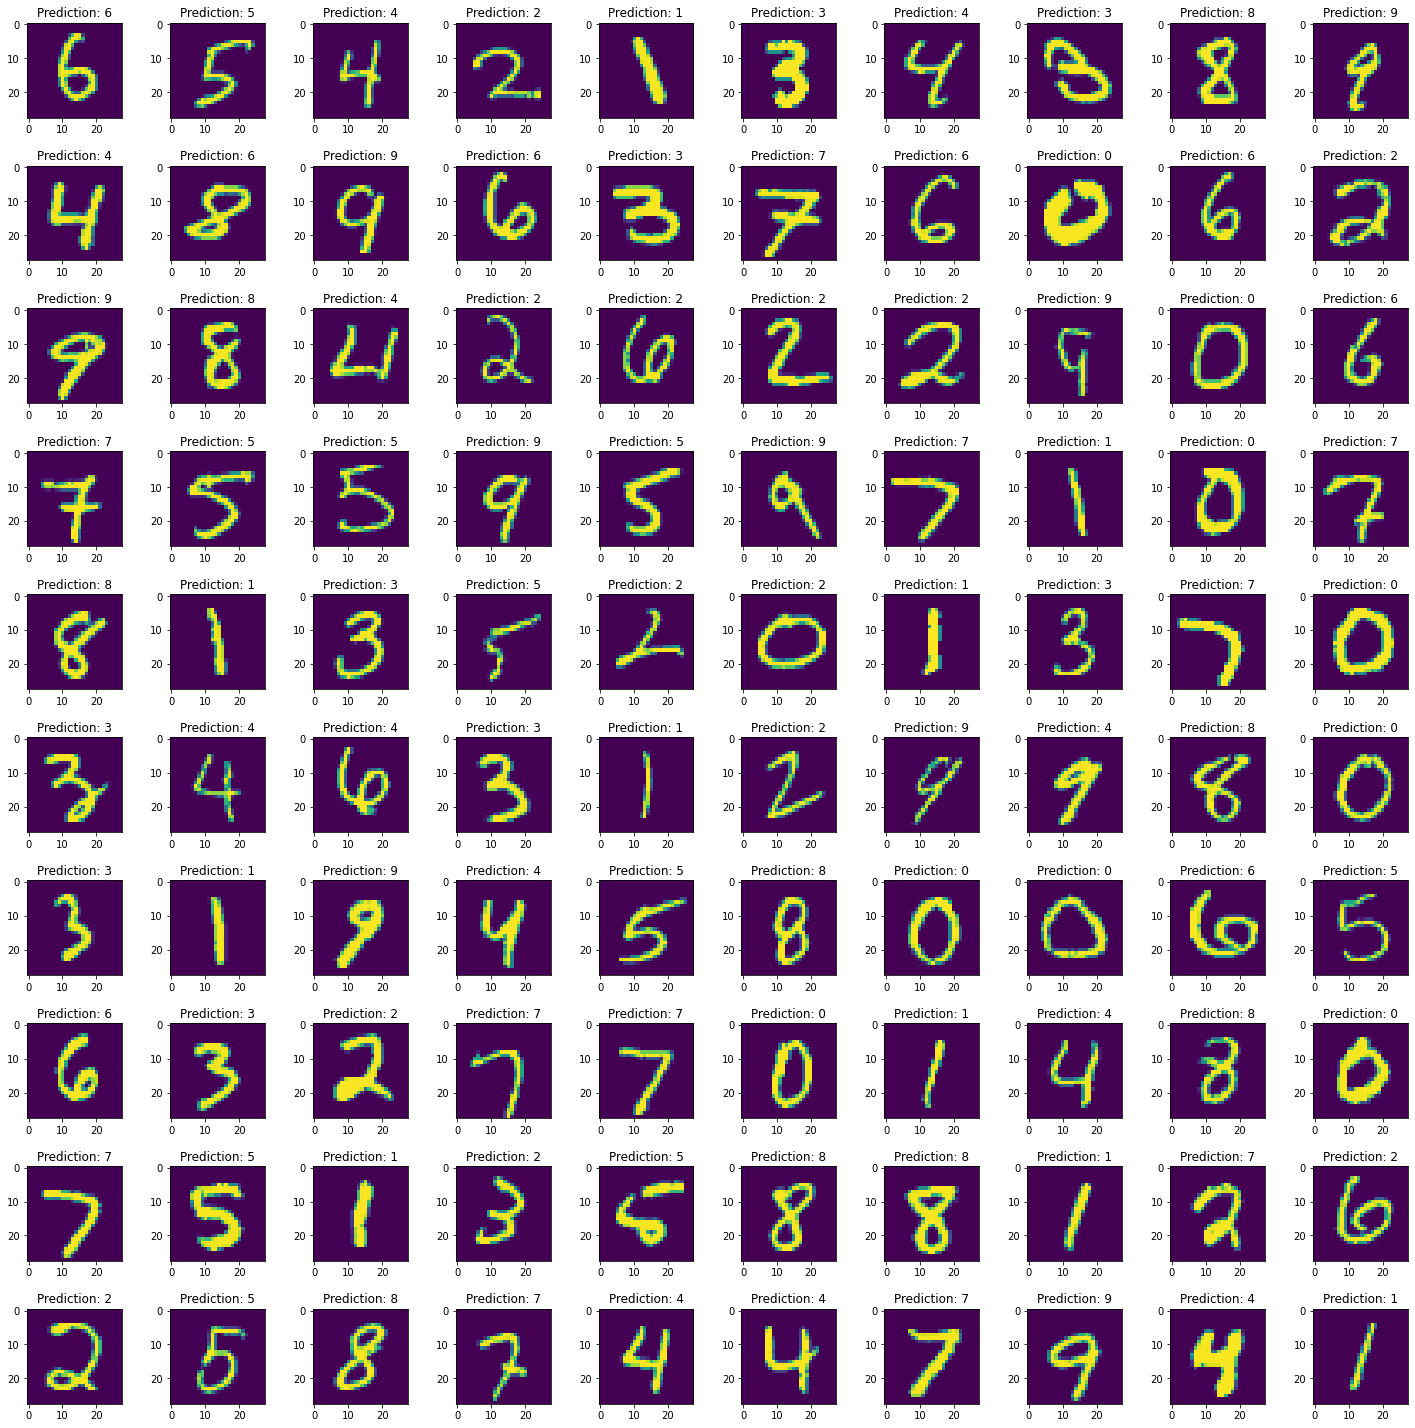

In [7]:
fig, axes = plt.subplots(10,10, figsize=(20,20))
fig.tight_layout()
for i,ax in enumerate(axes.flat):
    ax.imshow(x_test[i][0])
    ax.title.set_text(f'Prediction: {np.argmax(yp[i])}')